In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
CANVAS_W = 100
BORDERS = 5
CRITICAL_POINTS = [
    (0,0),
    (0, CANVAS_W),
    (CANVAS_W, 0),
    (CANVAS_W, CANVAS_W)
    ]
VECTOR_LEN = CANVAS_W * .125
VECTOR_NUM = 9 * 7 # 7  is a color period. The rainbow repeats 9 times. Overal 63 vectors, 9 times of each color


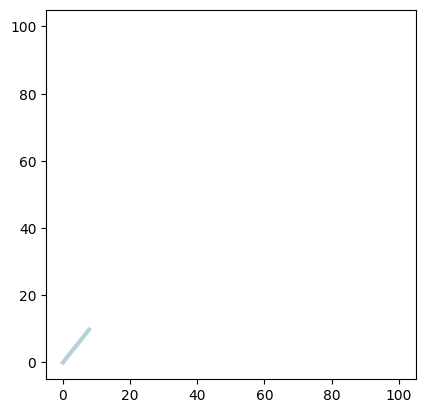

In [37]:
def new_coordinate(
        initial_coord: list[int],
        vector_length: float,
        angle_rad: float
    ):
    
    new_x = np.cos(angle_rad) * vector_length
    new_y = np.sin(angle_rad) * vector_length

    return (initial_coord[0]+new_x, initial_coord[1]+new_y)

a = [0,0]
b = new_coordinate([0,0], 12.5, np.random.rand()*np.pi/2)

def rand_color():
    return (np.random.rand(), np.random.rand(), np.random.rand())

plt.plot([a[0], b[0]], [a[1], b[1]], color=rand_color(), linewidth=3, alpha=.5)

plt.axis('square')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.show()

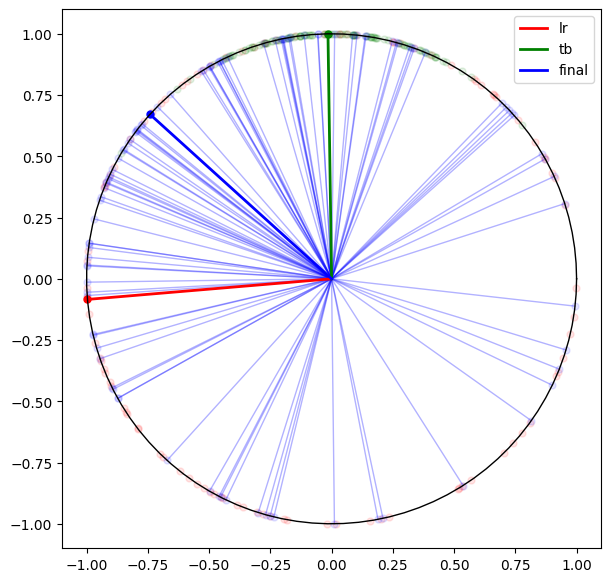

In [242]:
def proper_random_angle(cur_coord: list, max_x = CANVAS_W, max_y = CANVAS_W, num = 1):
    level_x = cur_coord[0] / max_x # measure of leftness / rightness
    level_y = cur_coord[1] / max_y # measure of bottomness / topness
    
    # this is main trend which should be balanced by opposite motion
    if level_x < 0.5:
        left_right = np.random.randn(num)*np.pi*np.abs(0.5)
    else:
        left_right = np.random.randn(num)*np.pi*np.abs(level_x-.1)+np.pi
    
    if level_y < .5:
        top_bottom = np.random.randn(num)*np.pi*np.abs(level_y-.1) + np.pi/2
    else:
        top_bottom = np.random.randn(num)*np.pi*np.abs(level_y-.1) + 3*np.pi/2
    
    final_angles = (top_bottom+left_right)/2
    
    return {'lr': left_right,
            'tb': top_bottom,
            'final': final_angles}

a = (90,0)
angles_data = proper_random_angle(a, num=100)
angles = angles_data['final']

for angle in angles_data["lr"]:
    plt.plot(np.cos(angle), np.sin(angle), 'ro', alpha=.1, markersize=5)

for angle in angles_data["tb"]:
    plt.plot(np.cos(angle), np.sin(angle), 'go', alpha=.1, markersize=5)

for angle in angles_data["final"]:
    plt.plot([0,np.cos(angle)], [0,np.sin(angle)], 'b', alpha=.3, linewidth=1)
    plt.plot(np.cos(angle), np.sin(angle), 'bo', alpha=.1, markersize=5)



colors = ['r', 'g', 'b']
for data_idx, data in enumerate(angles_data):
    plt.plot([0, np.cos(np.average(angles_data[data]))], [0, np.sin(np.average(angles_data[data]))], '-', color=colors[data_idx], linewidth=2, label=f'{data}')
    plt.plot(np.cos(np.average(angles_data[data])),  np.sin(np.average(angles_data[data])), 'o', color=colors[data_idx], markersize=5)


thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.plot(x, y, '-k', linewidth=1)
plt.axis('square')
plt.legend()
plt.gcf().set_size_inches(7,7)
plt.show()

Currently we are working on vector #0 oo 10
Opertaion # 0
Currently we are working on vector #1 oo 10
Opertaion # 0
Currently we are working on vector #2 oo 10
Opertaion # 0
Currently we are working on vector #3 oo 10
Opertaion # 0
Currently we are working on vector #4 oo 10
Opertaion # 0
Currently we are working on vector #5 oo 10
Opertaion # 0
Currently we are working on vector #6 oo 10
Opertaion # 0
Currently we are working on vector #7 oo 10
Opertaion # 0
Currently we are working on vector #8 oo 10
Opertaion # 0
Currently we are working on vector #9 oo 10
Opertaion # 0
Currently we are working on vector #10 oo 10
Opertaion # 0
Currently we are working on vector #11 oo 10
Opertaion # 0
Currently we are working on vector #12 oo 10
Opertaion # 0
Currently we are working on vector #13 oo 10
Opertaion # 0
Currently we are working on vector #14 oo 10
Opertaion # 0
Currently we are working on vector #15 oo 10
Opertaion # 0
Opertaion # 1
Opertaion # 2
Opertaion # 3
Opertaion # 4
Opertaion 

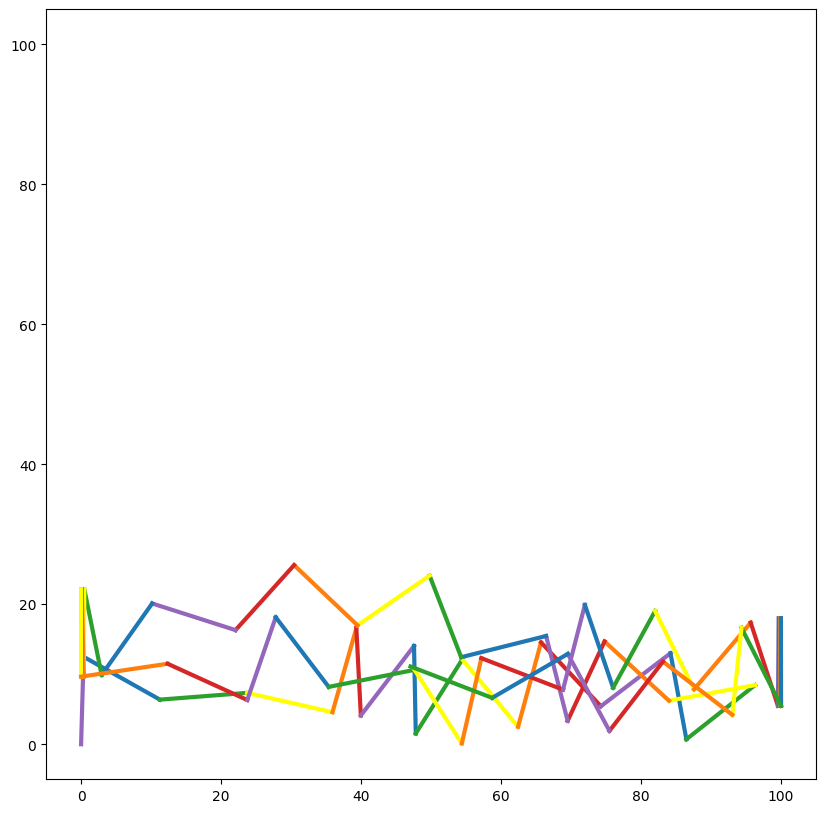

In [112]:
cur_coord = [0,0]
new_coord = [0,0]
angle_shift=0
colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']

for vector_idx in range(VECTOR_NUM):
    print(f"Currently we are working on vector #{vector_idx} oo 10")
    operation_idx = 0
    while cur_coord == new_coord or\
        (new_coord[0] < 0 or new_coord[0]>CANVAS_W)\
        or (new_coord[1] < 0 or new_coord[1] > CANVAS_W):
        print(f"Opertaion # {operation_idx}")
        operation_idx+=1
        if operation_idx >=1000 and not angle_shift:
            angle_shift = np.pi/2
        elif operation_idx >= 1000 and angle_shift:
            angle_shift=0
        if vector_idx % 2 == 0:
            random_angle = np.random.rand()*np.pi/2 + angle_shift
        else:
            random_angle = -np.random.rand()*np.pi/2 - angle_shift
        new_coord = new_coordinate(cur_coord, VECTOR_LEN, random_angle)
        
    plt.plot([cur_coord[0], new_coord[0]], [cur_coord[1], new_coord[1]], color = colors[vector_idx % len(colors)], linewidth=3)
    cur_coord = new_coord

plt.axis('square')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.gcf().set_size_inches(10,10)
plt.show()

